# Bootstrap distribution for hypothesis testing

Las distribuciones *bootstrap* están, por definición, centradas en el estadístico elegido. Sin embargo, como asumimos que la **hipótesis nula** es cierta, la distribución estará centrada en el valor *nulo*. Por tanto el **p-valor** se define como la proporción de simulaciones que, al menos, son tan favorables a la hipótesis alternativa como al estadístico observado

Graphical representation

![bootstrap](img/bootstrap.png)


Empezamos con nuestra distribución bootstrap, la cual está siempre centrada alrededor del parámetro estadístico deseado (sample statistic) Entonces desplazamos esta distribución hasta el centro del valor nulo y calculamos el p-valor, siendo este la proporción de las simulaciones que son al menos tan extremas como el estadístico observado.

In [2]:
import pandas as pd
import numpy as np
import scipy.stats as ss
import seaborn as sns
import matplotlib.pyplot as plt

# seaborn style
sns.set()

# my functions
import sys
sys.path.insert(0, '../statistics/')

import bootstrap

In [3]:
data = pd.read_csv('data/manhattan.csv')
data.head(3)

,rent
0,3850
1,3800
2,2350


## Comprobación de la media del precio de un apartamento en Manhattan

Let's turn our attention to Manhattan apartments. We would like to evaluate whether these data provide evidence that the median rent of 1 BR apartments in Manhattan is greater than $2,500.

* $H_{0}$: la media es 2500
* $H_{1}$: la media es superior a 2500

In [35]:
bs_median = bootstrap.draw_bs_reps(data=data['rent'].values,
                       func=np.median, size=15000)
np.median(bs_median), data['rent'].median()

(2350.0, 2350.0)

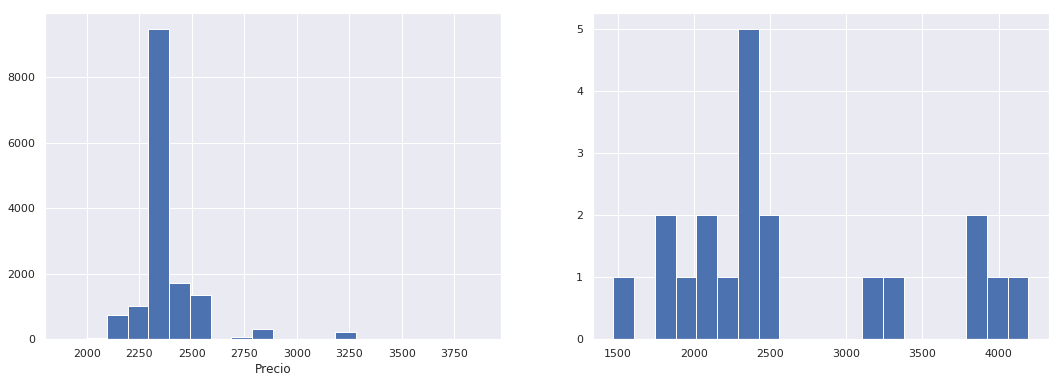

In [29]:
# visualizamos

# figure
plt.figure(figsize=(18,6))
plt.subplot(121)
plt.hist(bs_median, bins=20)
#plt.axvline(x=bs_median.mean(), color='green')
#plt.axvline(x=data['rent'].median(), color='red')
plt.xlabel("Precio")

plt.subplot(122)
plt.hist(data['rent'].values, bins=20)
plt.show()

Como hemos dicho anteriormente, las distribuciones *bootstrap* se diseñan centradas en el estadístico elegido. Sin embargo, si asumimos que la *hipótesis nula* $H_0$ es cierta, podemos mover la distribución para que esté centrada en el valor nulo.

Recordamos:
* $H_{0}$: la media es 2500
* $H_{1}$: la media es superior a 2500

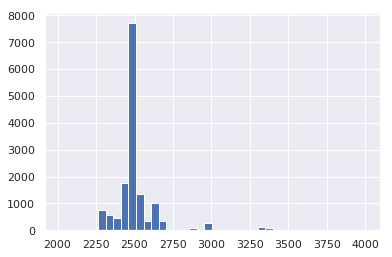

In [31]:
# centramos los valores
differences = 2500 - np.mean(bs_median)
bs_median_centered = bs_median + differences

# dibujamos los valores ya re-centrados
plt.hist(bs_median_centered, bins= 40)
plt.show()

In [34]:
np.sum(bs_median_centered > stat) / len(bs_median_centered)

0.9403333333333334

No rechazamos la hipótesis nula $H_0$ debido a que el **p-valor** está por encima del nivel de significancia, y concluimos que los datos no proporcionan evidencia convincente de que el alquiler medio de los apartamentos sea superior a $2500

## Percentile and standard error for bootstrap confidence intervals

En el gráfico anterior tenemos una representación de cada una de las medianas calculadas realizando *bootstraping*. Recordamos que un bootstrap sample es un conjunto de datos del mismo tamaño que el original, cuyos datos se obtienen del original con reemplazo.

Usando la *distribución* de datos procedente del *bootstraping*, podemos calcular el intervalo de confianza de dos formas distintas.

### Intervalos de confianza mediante los percentiles

Seleccionamos los percentiles 5th y 97.5th de la distribución *bootstrap* para obtener hasta el 95% de la información.

In [6]:
# percentile method
error01, error02 = np.percentile(bs_median, q=[0.05, 97.5])
error01, error02

(2000.0, 2875.0)

### Intervalos de confianza mediante SE

Para calcular SE (standard error) simplemente calculamos la desviación estándar de la distribución *bootstrap*.

In [8]:
# standard error method

# valor crítico
t_star = ss.t.ppf(q=0.975, df=data.shape[0] - 1)

# interval
error = np.std(bs_median)

error0 = np.median(bs_median) + t_star * error
error1 = np.median(bs_median) - t_star * error

# view
print(error0)
print(error1)

2701.966598398024
1998.0334016019758


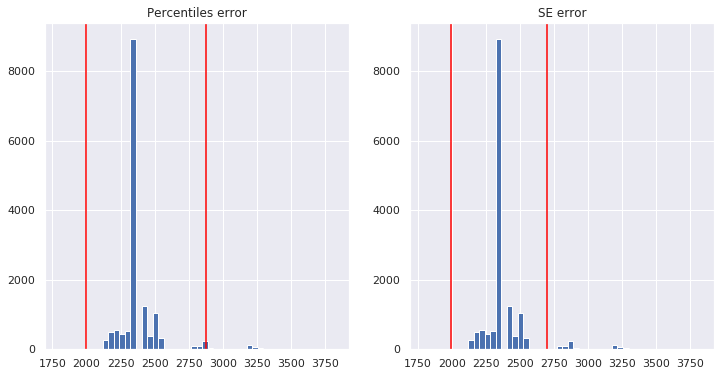

In [10]:
# visualizamos
plt.figure(figsize=(12,6))

plt.subplot(1,2,1)
plt.title("Percentiles error")
plt.hist(bs_median, bins=50)
plt.axvline(x=error01, color='red')
plt.axvline(x=error02, color='red')

plt.subplot(1,2,2)
plt.title("SE error")
plt.hist(bs_median, bins=50)
plt.axvline(x=error0, color='red')
plt.axvline(x=error1, color='red')
plt.show()